Mounted at /content/drive


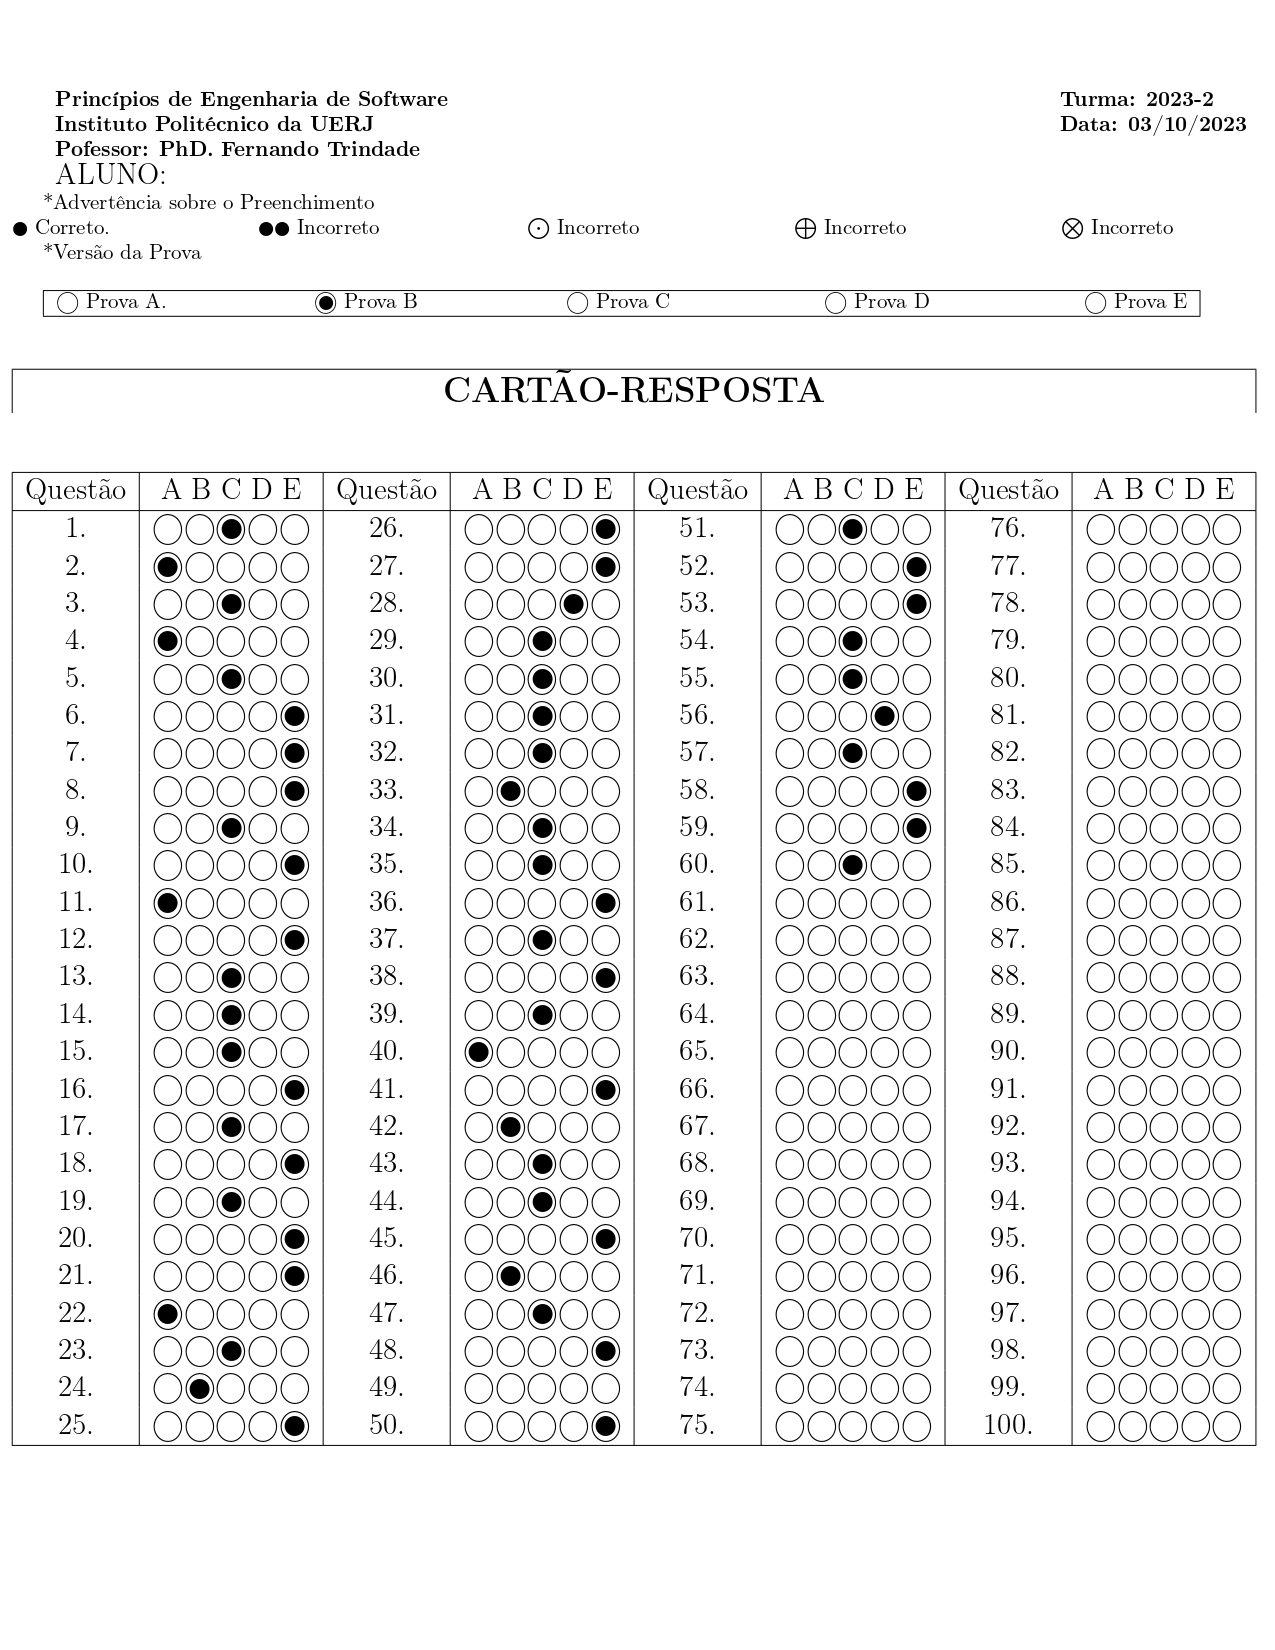

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import pandas as pd
import os

drive.mount("/content/drive")

image1 = cv2.imread("/content/drive/MyDrive/Trabalho2Visao/Leitor/prova B/provaB.jpg")
# image2 = cv2.imread("/content/drive/MyDrive/Trabalho2Visao/Leitor/scan0000.jpg")
gab = []
# image = cv2.resize(image2, [500, 648])
cv2_imshow(image1)
# cv2_imshow(image2)
# print(image.shape)
# cv2_imshow(image2)
# print(image.shape)

In [2]:
# # Store Pdf with convert_from_path function
# images = convert_from_path('Downloads/Lista 1.pdf', poppler_path=r'C:\Program Files\poppler-23.08.0\Library\bin')

# for i in range(len(images)):

#       # Save pages as images in the pdf
#     images[i].save('page'+ str(i) +'.jpg', 'JPEG')


In [3]:
def getMax(arr):
  for i in range(len(arr)):
    if arr[i] == max(arr):
      return i

In [4]:
def getOption(n):

  if n == 0:
    return("A")
  elif n == 1:
    return("B")
  elif n == 2:
    return("C")
  elif n == 3:
    return("D")
  elif n == 4:
    return("E")
  elif n == None:
    return("ONM") # Opção Não Marcada

In [5]:
def recognizeMarked(image):

  newImage = image.copy() # cópia da nova image

  col0 = [60, 184, 306, 428] # colunas pré-definidas para a análise
  contador = 1
  gab = []
  photo = []
  gray = []
  lim = []
  black = []

  for i in [0, 1, 2, 3]: # para cada coluna
    print("\n")

    for j in range(1, 26, 1): # para cada questão(linha)
      k = 0

      for k in range(1, 6, 1): # para cada opção

        target = newImage[200+int((j-1)*(570-200)/25):200+int((j)*(570-200)/25), col0[i]+(int((k-1)*(122-62)/5)):col0[i]+(int((k)*(122-62)/5))].copy() # foto de cada uma das opções
        photo.append(target)
        cv2_imshow(target)

      print(f"Questão {contador}, coluna: {i+1}, questão: {j}") # impressão de dados relevantes

    contador += 1

  for i in photo: # loop responsável por converter cada uma das opções para a escala de cinza
    # cv2_imshow(i)
    gray.append(cv2.cvtColor(i, cv2.COLOR_BGR2GRAY))

  for j in gray: # loop responsável por converter cada uma das imagens cinzas para binário
    _, aux = cv2.threshold(j, 230, 255, cv2.THRESH_BINARY)
    lim.append(aux)

  for k in lim: # loop responsável por realizar a soma sucessiva de pixels pretos
    black.append(np.sum(k == 0))

  # contador = 0 # redefinição do contador para reuso

  # for i in range(len(black)): # loop responsável por ver os valores das somas sucessivas de pixels pretos na imagem, de forma a validar os resultados obtidos
  #   if(contador % 5 == 0):
  #     print(f"Questão: {(contador/5)+1}")
  #   contador += 1
  #   print(black[i])

  contador = 1 # redefinição do contador para reuso
  aux = []

  for l in range(len(black)): # loop responsável pela montagem do gabarito, iterando sobre cada uma das imagens de cada uma das opções das questões
    if contador % 5 != 0:
      aux.append(black[l])
    else:
      aux.append(black[l])
      if max(aux) > 80:
        gab.append(getMax(aux))
        aux = []
      else:
        gab.append(None)
        aux = []
    contador += 1

  return gab # retorno desse dado para a função principal

listGabarito = recognizeMarked(image1)
# print(listGabarito)
gabarito = []

for i in listGabarito:
  gabarito.append(getOption(i))

for i in range(len(gabarito)):
  print(f"Questão {i+1}: {gabarito[i]}")

Questão 1, coluna: 1, questão: 1


Questão 1, coluna: 1, questão: 2


Questão 1, coluna: 1, questão: 3


Questão 1, coluna: 1, questão: 4


Questão 1, coluna: 1, questão: 5


Questão 1, coluna: 1, questão: 6


Questão 1, coluna: 1, questão: 7


Questão 1, coluna: 1, questão: 8


Questão 1, coluna: 1, questão: 9


Questão 1, coluna: 1, questão: 10


Questão 1, coluna: 1, questão: 11


Questão 1, coluna: 1, questão: 12


Questão 1, coluna: 1, questão: 13


Questão 1, coluna: 1, questão: 14


Questão 1, coluna: 1, questão: 15


Questão 1, coluna: 1, questão: 16


Questão 1, coluna: 1, questão: 17


Questão 1, coluna: 1, questão: 18


Questão 1, coluna: 1, questão: 19


Questão 1, coluna: 1, questão: 20


Questão 1, coluna: 1, questão: 21


Questão 1, coluna: 1, questão: 22


Questão 1, coluna: 1, questão: 23


Questão 1, coluna: 1, questão: 24


Questão 1, coluna: 1, questão: 25




Questão 2, coluna: 2, questão: 1


Questão 2, coluna: 2, questão: 2


Questão 2, coluna: 2, questão: 3


Questão 2, coluna: 2, questão: 4


Questão 2, coluna: 2, questão: 5


Questão 2, coluna: 2, questão: 6


Questão 2, coluna: 2, questão: 7


Questão 2, coluna: 2, questão: 8


Questão 2, coluna: 2, questão: 9


Questão 2, coluna: 2, questão: 10


Questão 2, coluna: 2, questão: 11


Questão 2, coluna: 2, questão: 12


Questão 2, coluna: 2, questão: 13


Questão 2, coluna: 2, questão: 14


Questão 2, coluna: 2, questão: 15


Questão 2, coluna: 2, questão: 16


Questão 2, coluna: 2, questão: 17


Questão 2, coluna: 2, questão: 18


Questão 2, coluna: 2, questão: 19


Questão 2, coluna: 2, questão: 20


Questão 2, coluna: 2, questão: 21


Questão 2, coluna: 2, questão: 22


Questão 2, coluna: 2, questão: 23


Questão 2, coluna: 2, questão: 24


Questão 2, coluna: 2, questão: 25




Questão 3, coluna: 3, questão: 1


Questão 3, coluna: 3, questão: 2


Questão 3, coluna: 3, questão: 3


Questão 3, coluna: 3, questão: 4


Questão 3, coluna: 3, questão: 5


Questão 3, coluna: 3, questão: 6


Questão 3, coluna: 3, questão: 7


Questão 3, coluna: 3, questão: 8


Questão 3, coluna: 3, questão: 9


Questão 3, coluna: 3, questão: 10


Questão 3, coluna: 3, questão: 11


Questão 3, coluna: 3, questão: 12


Questão 3, coluna: 3, questão: 13


Questão 3, coluna: 3, questão: 14


Questão 3, coluna: 3, questão: 15


Questão 3, coluna: 3, questão: 16


Questão 3, coluna: 3, questão: 17


Questão 3, coluna: 3, questão: 18


Questão 3, coluna: 3, questão: 19


Questão 3, coluna: 3, questão: 20


Questão 3, coluna: 3, questão: 21


Questão 3, coluna: 3, questão: 22


Questão 3, coluna: 3, questão: 23


Questão 3, coluna: 3, questão: 24


Questão 3, coluna: 3, questão: 25




Questão 4, coluna: 4, questão: 1


Questão 4, coluna: 4, questão: 2


Questão 4, coluna: 4, questão: 3


Questão 4, coluna: 4, questão: 4


Questão 4, coluna: 4, questão: 5


Questão 4, coluna: 4, questão: 6


Questão 4, coluna: 4, questão: 7


Questão 4, coluna: 4, questão: 8


Questão 4, coluna: 4, questão: 9


Questão 4, coluna: 4, questão: 10


Questão 4, coluna: 4, questão: 11


Questão 4, coluna: 4, questão: 12


Questão 4, coluna: 4, questão: 13


Questão 4, coluna: 4, questão: 14


Questão 4, coluna: 4, questão: 15


Questão 4, coluna: 4, questão: 16


Questão 4, coluna: 4, questão: 17


Questão 4, coluna: 4, questão: 18


Questão 4, coluna: 4, questão: 19


Questão 4, coluna: 4, questão: 20


Questão 4, coluna: 4, questão: 21


Questão 4, coluna: 4, questão: 22


Questão 4, coluna: 4, questão: 23


Questão 4, coluna: 4, questão: 24


Questão 4, coluna: 4, questão: 25
Questão 1: ONM
Questão 2: ONM
Questão 3: ONM
Questão 4: ONM
Questão 5: ONM
Questão 6: ONM
Questão 7: ONM
Questão 8: ONM
Questão 9: ONM
Questão 10: ONM
Questão 11: ONM
Questão 12: ONM
Questão 13: ONM
Questão 14: ONM
Questão 15: ONM
Questão 16: ONM
Questão 17: ONM
Questão 18: ONM
Questão 19: ONM
Questão 20: ONM
Questão 21: ONM
Questão 22: ONM
Questão 23: ONM
Questão 24: ONM
Questão 25: ONM
Questão 26: ONM
Questão 27: ONM
Questão 28: ONM
Questão 29: ONM
Questão 30: ONM
Questão 31: ONM
Questão 32: ONM
Questão 33: ONM
Questão 34: ONM
Questão 35: ONM
Questão 36: ONM
Questão 37: ONM
Questão 38: ONM
Questão 39: ONM
Questão 40: ONM
Questão 41: ONM
Questão 42: ONM
Questão 43: ONM
Questão 44: ONM
Questão 45: ONM
Questão 46: ONM
Questão 47: D
Questão 48: E
Questão 49: ONM
Questão 50: ONM
Questão 51: ONM
Questão 52: ONM
Questão 53: ONM
Questão 54: ONM
Questão 55: ONM
Questão 56: ONM
Questão 57: B
Questão 58: B
Questão 59: ONM
Questão 60: ONM
Questão 61: ONM
Questão

In [6]:
def identifyTestVersion(image):

  a = [23, 124, 223, 324, 426]
  b = [32, 133, 232, 333, 435]

  black = np.array([])

  for i in ([0, 1, 2, 3, 4]):
    target = image[114:125, a[i]:b[i]]

    gray = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)
    _, lim = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY)
    black = np.insert(black, len(black), np.sum(lim == 0))

  for i in range(len(black)):
    if black[i] == max(black):
      return i

version = getOption(identifyTestVersion(image))
print(version)

NameError: ignored

In [ ]:
dataframe = pd.DataFrame({'Versão': version, 'Gabarito': gabarito})
dataframe.to_excel("/content/drive/MyDrive/Trabalho2Visao/Leitor/dataframe.xlsx")